## Homework 5

## <em> Markov Chain Simulation and Hierarchical Model</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***


### Imports

In [10]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='ticks')

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
localpath='/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_HW5/'
colabpath='/content/drive/My Drive/P188_288/P188_288_HW5/'

***

#### Problem 1 - Simulated Annealing

Reference: Newman, Computational Physics (p. 490-497)<br><br>
For a physical system in equilibrium at temperature $T$, the probability that at any moment the system is in a state $i$ is given by the Boltzmann probability. Let us assume our system has single unique ground state and let us choose our energy scale so that $E_i = 0$ in the ground state and $E_i > 0$ for all other states. Now suppose we cool down the system to absolute zero. The system will definitely be in the ground state, and consequently one way to find the ground state of the system is to cool it down to $T = 0$.
<br><br>
This in turn suggests a computational strategy for finding the ground state: let us simulate the system at temperature $T$, using the Markov chain Monte Carlo method, then lower the temperature to zero and the system should find its way to the ground state. This same approach could be used to find the minimum of any function, not just the energy of a physical system. we can take any mathematical function $f(x, y, z, ...)$ and treat the independent variables $x, y, z$ as defining a "state" of the system and $f$ as being the energy of that system, then perform a Monte Carlo simulation. Taking the temperature down to zero will again cause the system to fall into its ground state, i.e. the state with the lowest value of $f$, and hence we find the minimum of the function.
<br><br>
However, if the system is cooled rapidly, it can get stuck in a local energy minimum. On the other hand, an annealed system, one that is cooled sufficiently slowly, can find its way to the ground state. Simulated annleaing applies the same idea in a computational setting. It mimics the slow cooling of a material on the computer by using a Monte Carlo simulation with a temperature parameter that is gradually lowered from an initially high value towards zero. The initial temperature should be chosen so that the system equilibrates quickly. To achieve this, we should choose the thermal energy to be significantly greater than the typical energy change accompanying a single Monte Carlo move.
<br><br>
As for the rate of cooling, one typically specifies a "cooling schedule," a trajectory for the temperature as a function of time, and the most common choise is the exponential one:
<br><br>
$$ T = T_0 e^{-t/\tau} $$
<br><br>
where $T_0$ is the initial temperature, and $\tau$ is a time constant. Some trial error may be necessary to find a good value for $\tau$.
<br><br>
As an example of the use of simulated annealing, we will look at one of the most famous optimization problems, traveling salesman problem, which involves finding the shortest route that visits a given set of locations on a map. A salesman wishes to visit $N$ given cities, and we assume that he can travel in a straight line between any pair of citiies. Given the coordinates of the cities, the problem is to devise the shortest tour. It should start and end at the same city, and all cities must be visited at least once. Let us denote the position of the city $i$ by the two-dimensional vector $r_i = (x_i, y_i)$.
<br><br>
Here is the solution:


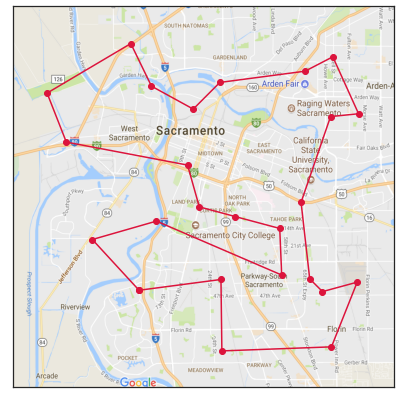

In [ ]:
# Traveling salesman (Newman p. 493)
from math import sqrt,exp
from numpy import empty
from random import random,randrange
from imageio import imread

N = 25
R = 0.02
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD

plt.figure(figsize = (8, 7))
img = imread(localpath+"map_sacramento.png")
plt.plot(r[:,0], r[:,1], 'o-', color = 'crimson', zorder=1)
plt.imshow(img,zorder=0, extent=[-0.1, 1.1, -0.1, 1.1])
plt.xticks([])
plt.yticks([])
plt.show()

Now, consider the function $f(x) = x^2 − \mathrm{cos}(4\pi x)$, which looks like this:

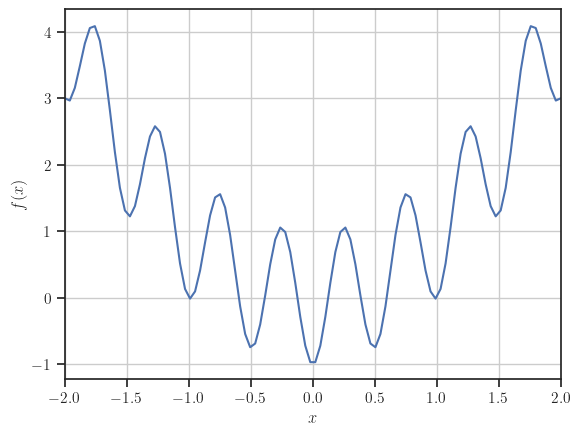

In [35]:
x = np.linspace(-2, 2, 100)
y = x**2 - np.cos(4*np.pi*x)
plt.plot(x, y)
plt.grid(True); plt.xlim(-2, 2); plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.show()

Clearly the global minimum of this function is at $x = 0$.

<span style="color:blue"><i> 1. Write a program to confirm this fact using simulated annealing starting at, say, $x = 2$, with Monte Carlo moves of the form $x \rightarrow x + \delta$ where $\delta$ is a random number drawn from a Gaussian distribution with mean zero and standard deviation one. Use an exponential cooling schedule and adjust the start and end temperatures, as well as the exponential constant, until you find values that give good answers in reasonable time. Have your program make a plot of the values of $x$ as a function of time during the run and have it print out the final value of x at the end. You will find the plot easier to interpret if you make it using dots rather than lines, with a statement of the form plot(x,".") or similar. </i></span> <br>

Final value of x: 0.006022267103826772


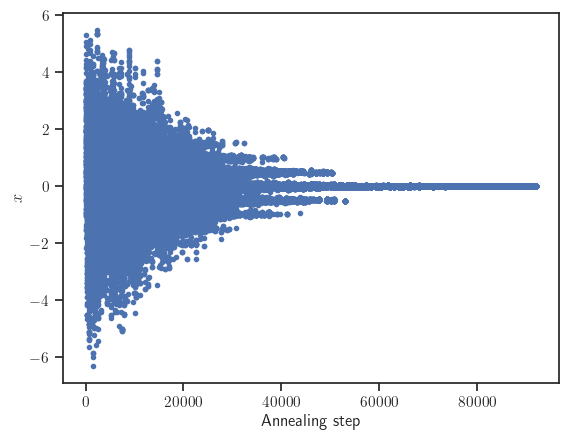

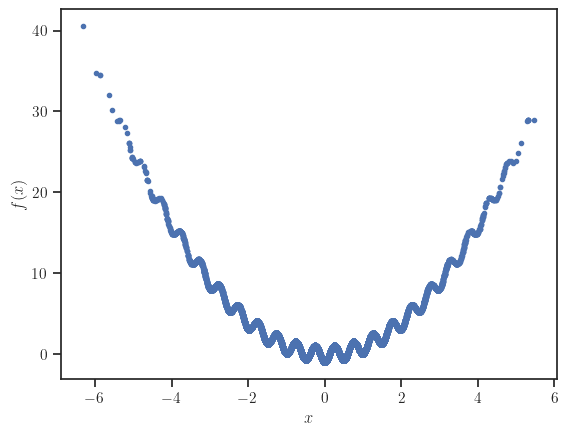

In [56]:
f = lambda x: x**2 - np.cos(4*np.pi*x)

Tmax = 10.0
Tmin = 1e-3
tau = 1e4
x = 2
y = f(x)
t = 0
T = Tmax
chain = [[x,y]]

while T>Tmin:
    t += 1
    T = Tmax*exp(-t/tau)

    delta = np.random.normal()
    old_x = x
    old_y = y
    x+=delta
    y = f(x)
    if random()>exp(-(y-old_y)/T):
        x = old_x
        y = old_y
    chain.append([x,y])
print('Final value of x:', x)
# Trajectory as function of time
chain=np.array(chain)
plt.plot(chain[:,0], '.')
plt.xlabel('Annealing step')
plt.ylabel('$x$')
plt.show()

plt.plot(chain[:,0], chain[:,1], '.')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

<span style="color:blue"> <i> 2. Now adapt your program to find the minimum of the more complicated function $f(x) = \mathrm{cos}(x) + \mathrm{cos}(\sqrt{2}x) + \mathrm{cos}(\sqrt{3}x)$ in the range $0 < x < 50$. </i></span><br><br>
(Hint: The correct answer is around $x = 16$, but there are also competing minima around $x = 2$ and $x = 42$ that your program might find. In real-world situations, it is often good enough to find any reasonable solution to a problem, not necessarily the absolute best, so the fact that the program sometimes settles on these other solutions is not necessarily a bad thing.)

Final value of x: 15.970289576234196


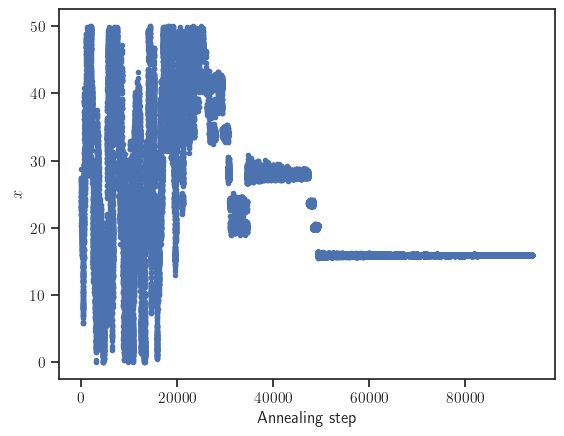

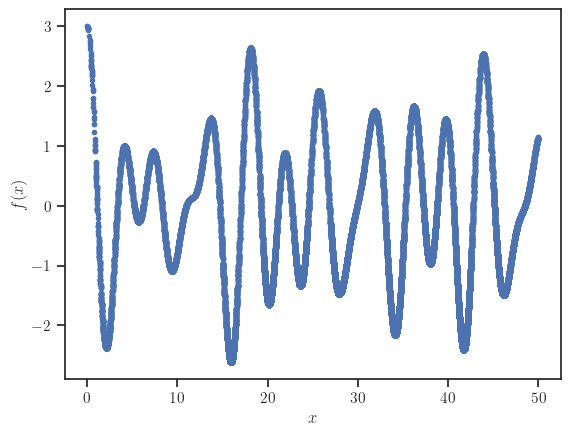

In [45]:
f = lambda x: np.cos(x) + np.cos(sqrt(2)*x) + np.cos(sqrt(3)*x)

Tmax = 12.0
Tmin = 1e-3
tau = 1e4
x = np.random.uniform(0,50)
y = f(x)
t = 0
T = Tmax
chain = [[x,y]]

while T>Tmin:
    t += 1
    T = Tmax*exp(-t/tau)

    old_x = x
    old_y = y
    delta = np.random.normal()
    while (x+delta)>50 or (x+delta)<0:
        delta = np.random.normal()
    x+=delta
    y = f(x)
    if random()>exp(-(y-old_y)/T):
        x = old_x
        y = old_y
    chain.append([x,y])
print('Final value of x:', x)
chain=np.array(chain)
# Trajectory as function of time
chain=np.array(chain)
plt.plot(chain[:,0], '.')
plt.xlabel('Annealing step')
plt.ylabel('$x$')
plt.show()

plt.plot(chain[:,0], chain[:,1], '.')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

***

#### Problem 2 - Hierarchial Normal Model

Reference: Gelman et al., Bayesian Data Analysis (p. 288-290) <br><br>
![alt text](https://drive.google.com/uc?id=1xbNEwZ0G6v2cj3uTLSq_jVUXkr4sDuOe)
Table 1. Coagulation time in seconds for blood drawn from 24 animals randomly allocated to four different diets. Different treatments have different numbers of observations because the randomization was unrestricted.<br><br>
Under the hierarchical normal model, data $y_{ij}$, for $i = 1, ..., n_j$ and $j = 1, ... ,J$, are independently normally distributed within each of $J$ groups, with means $\theta_j$ and common variance $\sigma^2$. The data is presented in Table 1. (In this case, there are $J = 4$ groups (or 4 sets of experiments - A, B, C, and D), and for each group $j$, we have a data vector $y_j$ with the mean $\theta_j$; $y_j = [y_{1j}, ... , y_{n_j\ j}]$ (there have been $n_j$ observations made.) (e.g. j = 1 represents the diet A group. So $y_{i1} = [y_{11}, y_{21}, y_{31}, y_{41}] = [62, 60, 63, 59]$ with $n_1 = 4.$ <br><br>
The total number of observations is $n = \sum_{j=1}^J n_j$. The group means ($\theta_j$) are assumed to follow a normal distribution with unknown mean $\mu$ and variance $\tau^2$, and a uniform prior distribution is assumed for $(\mu, \mathrm{log}\sigma, \tau)$, with $\sigma > 0$ and $\tau > 0$; equivalently, $p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \propto \tau$. <br><br>
The joint posterior density of all the parameters is<br><br>
$$ p(\theta, \mu, \mathrm{log}\sigma, \mathrm{log}\tau\ \vert\ y) \propto p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2) $$
<br><br>
where $\mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) = \frac{1}{\sqrt{2\pi \tau^2}}\mathrm{exp}(-\frac{(\theta_j-\mu)^2}{2\tau^2})$.
<br><br>
<span style="color:blue"> <i> 1. Now, find the MAP (Maximum A Posteriori) solution to this (find the solution to MAP for all these parameters). In other words, find $\theta_j, \mu, \sigma, \tau$ which maximizes the likelihood. </i></span><br><br>
(Hint: The likelihood is given as $\prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2)$. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. Make a reasonable guess! You can use a different in-built function to maximize the likelihood function. <br>
Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)

In [11]:
# Load data
A = np.array([62, 60, 63, 59])
B = np.array([63, 67, 71, 64, 65, 66])
C = np.array([68, 66, 71, 67, 68, 68])
D = np.array([56, 62, 60, 61, 63, 64, 63, 59])

data = []
data.append(A)
data.append(B)
data.append(C)
data.append(D)

data = np.array(data)

/var/folders/t8/7g7jdx3n3k922dx6x9y00dd40000gp/T/ipykernel_29325/1253991366.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [12]:
from scipy import optimize

# this is such a heinous way to write this. i'm sorry.
def minus_log_likelihood(param, y_i1=data[0], y_i2=data[1], y_i3=data[2], y_i4=data[3]):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    thetas = param[:4]
    # lntheta = np.sum(-0.5*(np.log(2*np.pi*tau**2)+(thetas-mu)**2/(tau**2)))
    prod_theta = np.sum(np.log(1/np.sqrt(2*np.pi*tau**2))-(thetas-mu)**2/(2*tau**2))
    prod_yi1 = np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i1-theta1)**2/(2*sigma**2))
    prod_yi2 = np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i2-theta2)**2/(2*sigma**2))
    prod_yi3 = np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i3-theta3)**2/(2*sigma**2))
    prod_yi4 = np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i4-theta4)**2/(2*sigma**2))
    return -(prod_theta+prod_yi1+prod_yi2+prod_yi3+prod_yi4)

# but this is even worse lol
def minus_log_likelihood2(param, y_i1=data[0], y_i2=data[1], y_i3=data[2], y_i4=data[3]):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    prod = np.log(1/np.sqrt(2*np.pi*tau**2))-(theta1-mu)**2/(2*tau**2)
    prod += np.log(1/np.sqrt(2*np.pi*tau**2))-(theta2-mu)**2/(2*tau**2)
    prod += np.log(1/np.sqrt(2*np.pi*tau**2))-(theta3-mu)**2/(2*tau**2)
    prod += np.log(1/np.sqrt(2*np.pi*tau**2))-(theta4-mu)**2/(2*tau**2)
    prod += np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i1-theta1)**2/(2*sigma**2))
    prod += np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i2-theta2)**2/(2*sigma**2))
    prod += np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i3-theta3)**2/(2*sigma**2))
    prod += np.sum(np.log(1/np.sqrt(2*np.pi*sigma**2))-(y_i4-theta4)**2/(2*sigma**2))
    return -prod

In [13]:
param = [np.mean(data[0]),np.mean(data[1]),np.mean(data[2]),np.mean(data[3]),
         np.mean(np.hstack(data.flatten())),np.std(np.hstack(data.flatten())),np.std(np.hstack(data.flatten()))]
max_param = optimize.fmin(minus_log_likelihood, param)
print('Theta1 =', max_param[0])
print('Theta2 =', max_param[1])
print('Theta3 =', max_param[2])
print('Theta4 =', max_param[3])
print('Mu =', max_param[4])
print('Sigma =', max_param[5])
print('Tau =', max_param[6])

Optimization terminated successfully.
         Current function value: 62.526371
         Iterations: 320
         Function evaluations: 512
Theta1 = 61.40089831695195
Theta2 = 65.81596587968568
Theta3 = 67.63052003355952
Theta4 = 61.21473988438534
Mu = 64.01552287706689
Sigma = 2.1797867842749383
Tau = 2.783461984296999


You should find that the MAP solution is dependent on your initial guesses. The point is that the maximal likelihood estimator is biased, even though we have all the parameters.
Hence, it is better to use the Monte Carlo simulation for the parameter estimation; we can also determine posterior quantiles with the Monte Carlo method. First, we will try the <b>Gibbs sampler</b>. <br><br>
<b>Starting points:</b><br>
In this example, we can choose overdispersed starting points for each parameter $\theta_j$ by simply taking random points from the data $y_{ij}$ from group $j$. We obtain 10 starting points for the simulations by drawing $θ_j$ independently in this way for each group. We also need starting points for $\mu$, which can be taken as the average of the starting $θ_j$ values. No starting values are needed for $\tau$ or $\sigma$ as they can be drawn as the first steps in the Gibbs sampler.<br><br>
<b>Conditional posterior distribution of $\sigma^2$:</b><br>
The conditional posterior density for $\sigma^2$ has the form corresponding to a normal variance with known mean; there are $n$ observations $y_{ij}$ with means $\theta_j$. The conditional posterior distribution is<br>
$$ \sigma^2 | \theta, \mu, \tau, y \sim \mathrm{Inv}\mbox{-}\chi^2(n, \hat{\sigma}^2) $$
<br>
where $$\mathrm{Inv}\mbox{-}\chi^2(x|n, \hat{\sigma}^2) = \mathrm{Inv\mbox{-}gamma}\Big(\alpha = \frac{n}{2}, \beta = \frac{n}{2}\hat{\sigma}^2 \Big) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{-(\alpha+1)}\mathrm{exp}(-\beta/x)$$
<br>
$$ \hat{\sigma}^2 = \frac{1}{n}\sum_{j=1}^J \sum_{i=1}^{n_j} (y_{ij}-\theta_j)^2 $$
<br><br>
(Hint: You can take random samples from the inverse gamma function using scipy.stats.invgamma - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.invgamma.html. <br> invgamma.rvs(alpha, scale = beta, size=1) will take one random sample from $\mathrm{Inv\mbox{-}gamma}(\alpha, \beta)$.)
<br><br>
<b>Conditional posterior distribution of $\tau^2$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \tau^2 | \theta, \mu, \sigma, y \sim \mathrm{Inv}\mbox{-}\chi^2(J-1, \hat{\tau}^2) $$
<br>
with $$ \hat{\tau}^2 = \frac{1}{J-1} \sum_{j=1}^J (\theta_j - \mu)^2. $$
<br><br>
<b>Conditional posterior distribution of each $\theta_j$:</b><br>
The factors in the joint posterior density that involve $\theta_j$ are the $N(\mu, \tau^2)$ prior distribution and the normal likelihood from the data in the $j$th group, $y_{ij}$ , $i = 1, ... , n_j$ . The conditional posterior distribution of each $\theta_j$ given the other parameters in the model is <br>
$$ \theta_j | \mu, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\theta_j}, V_{\theta_j}) $$
<br><br>
where the parameters of the conditional posterior distribution depend on $\mu, \sigma, \tau$ as well as $y$:
<br><br>
$$ \hat{\theta_j} = \frac{\frac{1}{\tau^2}\mu + \frac{n_j}{\sigma^2}(\frac{1}{n_j}\sum_{i=1}^{n_j} y_{ij})}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br>
$$ V_{\theta_j} = \frac{1}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br><br>
These conditional distributions are independent; thus drawing the $\theta_j$’s one at a time is equivalent to drawing the vector $\theta$ all at once from its conditional posterior distribution.
<br><br>
<b>Conditional posterior distribution of $\mu$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \mu | \theta, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\mu}, \tau^2/J) $$
<br>
where $\hat{\mu} = \frac{1}{J}\sum_{j=1}^J \theta_j$.

<br><br>
<span style="color:blue"> <i> 2. Define a function which does the Gibbs sampling. Take 100 samples. Remove the first 50 sequences and store the latter half. Repeat this 10 times so that you get ten Gibbs sampler sequences, each of length 50. We have 7 parameters ($\theta_1, ..., \theta_4, \mu, \sigma, \tau$), and for each parameter, you created 10 chains, each of length 50. </i></span>

In [14]:
import random
from scipy.stats import invgamma, norm
from math import sqrt

def Gibbs_sampler(data, nsamples=100):
    J = len(data)
    n = len(np.hstack(data.flatten()))
    theta = np.array([random.choices(data[0]), random.choices(data[1]), random.choices(data[2]), random.choices(data[0])]).flatten()
    mu = np.mean(theta)
    seq = np.empty([50,7])
    for ns in range(nsamples):
        sigma_hat_sq = 1/n*np.sum([np.sum((data[j]-theta[j])**2) for j in range(J)])
        sigma_sq = invgamma.rvs(n/2, scale=n/2*sigma_hat_sq, size=1)[0]
        tau_hat_sq = 1/(J-1)*np.sum((theta-mu)**2)
        tau_sq = invgamma.rvs((J-1)/2, scale=(J-1)/2*tau_hat_sq, size=1)[0]
        V_theta = np.array([1/(1/tau_sq + len(data[j])/sigma_sq) for j in range(J)]).flatten()
        theta_hat = V_theta*(mu/tau_sq + np.array([np.sum(data[j]) for j in range(J)])/sigma_sq)
        theta_hat = V_theta*(mu/tau_sq + np.array([len(data[j])/sigma_sq*np.mean(data[j]) for j in range(J)]))
        theta = np.array([norm.rvs(theta_hat[j], scale=np.sqrt(V_theta[j])) for j in range(J)]).flatten()
        mu_hat = np.mean(theta)
        mu = norm.rvs(mu_hat, scale=np.sqrt(tau_sq/J))
        if ns>=50:
            seq[ns%50]=[theta[0], theta[1], theta[2], theta[3], mu, np.sqrt(sigma_sq), np.sqrt(tau_sq)]
    return seq

In [15]:
gs = []
for i in range(10):
    gs.append(Gibbs_sampler(data))

In [16]:
np.shape(np.array(gs))

(10, 50, 7)

<span style="color:blue"> <i> 3. Estimate posterior quantiles. Find 2.5%, 25%, 50%, 75%, 97.5% posterior percentiles of all parameters. Print results. (suggestion - you may find pandas.DataFrame useful.) </i></span><br>
(Hint: You can use np.percentile - https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html.)

In [69]:
import pandas as pd

param_names = ['Theta1', 'Theta2', 'Theta3', 'Theta4', 'Mu', 'Sigma', 'Tau']
pctiles = [2.5, 25, 50, 75, 97.5]
pos_pctiles = [np.percentile(np.array(gs).reshape(500,7), pct, axis=0) for pct in pctiles]
print('Percentiles:')
df = pd.DataFrame({str(pctiles[i]):list(pos_pctiles[i]) for i in range(len(pctiles))})
df.rename(index={i:param_name for i,param_name in enumerate(param_names)})
# df.style.set_caption('Percentile')

Percentiles:


,2.5,25,50,75,97.5
Theta1,58.998266,60.503576,61.293575,62.053939,63.677565
Theta2,64.009252,65.265066,65.969250,66.534903,67.972567
Theta3,65.811197,67.019511,67.734922,68.385785,69.810224
Theta4,59.560466,60.572933,61.131561,61.660588,62.956085
Mu,55.440549,62.290290,63.802817,65.410137,71.512112
Sigma,1.796453,2.143940,2.396220,2.646832,3.320287
Tau,1.887308,3.388295,4.805945,7.428785,23.597822


<span style="color:blue"> <i> 4. Now, test for convergence using "Gelman-Rubin statistic." For all seven parameters, compute $R$ and determine if the condition $R < 1.1$ is satisfied.  </i></span><br><br>
For a given parameter $\theta$, the $R$ statistic compares the variance across chains with the variance within a chain.
<br>Given chains $J=1,\ldots,m$, each of length $n$, <br>
Let $B=\frac{n}{m-1} \sum_j \left(\bar{\theta}_j - \bar{\theta}\right)^2$, where $\bar{\theta_j}$ is the average $\theta$ for chain $j$ and $\bar{\theta}$ is the global average. This is proportional to the variance of the individual-chain averages for $\theta$.<br>
Let $W=\frac{1}{m}\sum_j s_j^2$, where $s_j^2$ is the estimated variance of $\theta$ within chain $j$. This is the average of the individual-chain variances for $\theta$.<br>
Let $V=\frac{n-1}{n}W + \frac{1}{n}B$. This is an estimate for the overall variance of $\theta$.
<br><br>
Finally, $R=\sqrt{\frac{V}{W}}$. We'd like to see $R\approx 1$ (e.g. $R < 1.1$ is often used). Note that this calculation can also be used to track convergence of combinations of parameters, or anything else derived from them.

In [50]:
n=50
m=10
global_avg = np.mean(np.mean(gs, axis=0), axis=0)
chain_avg = np.mean(gs, axis=1)
chain_std = np.std(gs, axis=1)
B = n/(m-1)*np.sum((chain_avg - global_avg)**2, axis=0)
W = 1/m*np.sum(chain_std**2, axis=0)
V = (n-1)/n*W + 1/n*B
R = np.sqrt(V/W)
param_names = ['Theta1', 'Theta2', 'Theta3', 'Theta4', 'Mu', 'Sigma', 'Tau']
for i, name in enumerate(param_names):
    print(name+' R =', R[i])

Theta1 R = 0.9968648889511851
Theta2 R = 0.9929783402078384
Theta3 R = 0.9974285555284673
Theta4 R = 1.0032206091147908
Mu R = 1.0203671015884974
Sigma R = 1.0010291663687578
Tau R = 1.0167151560809773


$R < 1.1$ is satisfied for all parameters.

Now, try the <b>Metropolis algorithm</b>.

<span style="color:blue"> <i> 5. Run ten parallel sequences of Metropolis algorithm simulations using the package "emcee" (http://dfm.io/emcee/current/). First, define the log of prior (already given to you), likelihood, and posterior (Hint: http://dfm.io/emcee/current/user/line/) </i></span><br>

In [51]:
!pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.3 MB/s eta 0:00:00


In [49]:
import emcee

In [51]:
def log_prior(param):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    if sigma > 0 and tau > 0:
        return 0.0
    return -np.inf

def log_likelihood(param, data0, data1, data2, data3):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    return -minus_log_likelihood(param, data0, data1, data2, data3)

def log_posterior(param, data0, data1, data2, data3):
    if not np.isfinite(log_prior(param)):
        return -np.inf
    return log_prior(param) + log_likelihood(param, data0, data1, data2, data3)

<span style="color:blue"> <i> 6. Now, try different number of MCMC walkers and burn-in period, and number of MCMC steps. At which point do you obtain similar results to those obtained
using Gibbs sampling? Run the MCMC chain and estimate posterior quantiles as in Part 3. </i></span><br>

In [52]:
emcee_trace = []
for i in range(10):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps

    ndim = 7  # number of parameters in the model
    nwalkers = 50  # number of MCMC walkers
    nburn = 500 # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # set theta near the maximum likelihood, with
    starting_guesses = np.random.random((nwalkers, ndim))

    # Here's the function call where all the work happens:
    # we'll time it using IPython's %time magic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data[0], data[1], data[2], data[3]])
    sampler.run_mcmc(starting_guesses, nsteps)

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)

emcee_trace = np.array(emcee_trace)



In [53]:
np.shape(emcee_trace)

(10, 7, 25000)

In [68]:
param_names = ['Theta1', 'Theta2', 'Theta3', 'Theta4', 'Mu', 'Sigma', 'Tau']
pctiles = [2.5, 25, 50, 75, 97.5]
pos_pctiles = [np.percentile(emcee_trace, pct, axis=(2,0)) for pct in pctiles]
print('Percentiles:')
df = pd.DataFrame({str(pctiles[i]):list(pos_pctiles[i]) for i in range(len(pctiles))})
df.rename(index={i:param_name for i,param_name in enumerate(param_names)})
# df.style.set_caption('Percentile')

Percentiles:


,2.5,25,50,75,97.5
Theta1,58.754526,60.403100,61.225034,62.042585,63.805030
Theta2,63.728194,65.168769,65.875939,66.571463,67.914617
Theta3,65.600941,67.081384,67.792021,68.478448,69.863295
Theta4,59.375698,60.538280,61.120388,61.706698,62.964645
Mu,52.777498,62.102168,63.919332,65.760590,75.079973
Sigma,1.847385,2.231801,2.486479,2.792050,3.561707
Tau,1.955204,3.530736,5.212440,8.580324,34.943493


Using the package "corner," you can also easily plot the 1-d and 2-d posterior (looks familiar?). Make a plot for one chain. Plots along the diagonal correspond to 1-d constraints. The dotted lines show 16%, 50%, and 84% percentile ranges.

In [ ]:
!pip install corner

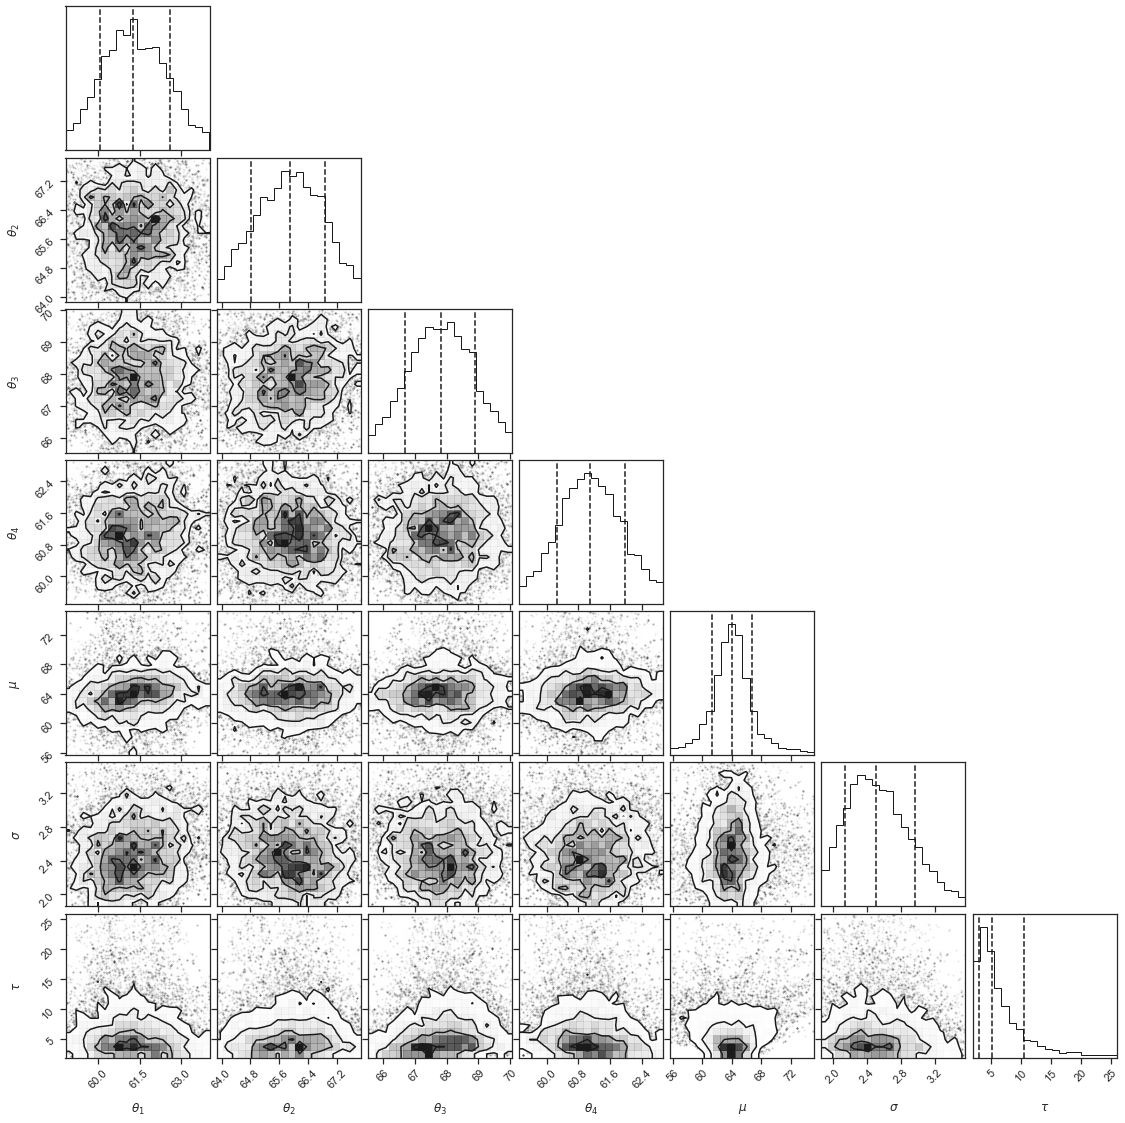

In [55]:
import corner
fig = corner.corner(emcee_trace[0, :, :].T, labels=["$\\theta_1$", "$\\theta_2$", "$\\theta_3$", "$\\theta_4$", "$\mu$", "$\sigma$", "$\\tau$"], quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(7))


<span style="color:blue"> <i> 6. Test for convergence using Gelman-Rubin statistic as in Part 4. </i></span><br>

In [56]:
n=25000
m=10
global_avg = np.mean(emcee_trace, axis=(2,0))
chain_avg = np.mean(emcee_trace, axis=2)
chain_std = np.std(emcee_trace, axis=2)
B = n/(m-1)*np.sum((chain_avg - global_avg)**2, axis=0)
W = 1/m*np.sum(chain_std**2, axis=0)
V = (n-1)/n*W + 1/n*B
R = np.sqrt(V/W)
param_names = ['Theta1', 'Theta2', 'Theta3', 'Theta4', 'Mu', 'Sigma', 'Tau']
for i, name in enumerate(param_names):
    print(name+' R =', R[i])

Theta1 R = 1.001413686145922
Theta2 R = 1.0006320179343298
Theta3 R = 1.0021724692023695
Theta4 R = 1.0008526953297865
Mu R = 1.002690575859359
Sigma R = 1.0021741138516262
Tau R = 1.0042580977849906


$R < 1.1$ is satisfied for all parameters.

<span style="color:blue"> <i> 7. Using autocorrelation_plot from pandas (https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-autocorrelation), plot the auto-correlation of six parameters and determine that it gets small for large lag. </i></span><br>


In [57]:
from pandas.plotting import autocorrelation_plot

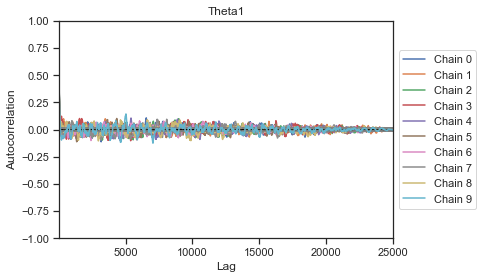

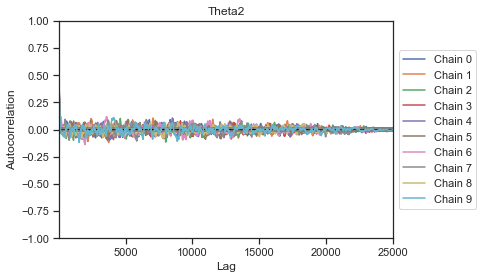

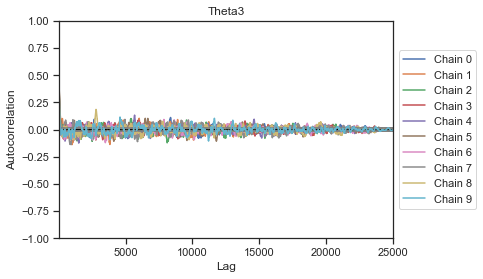

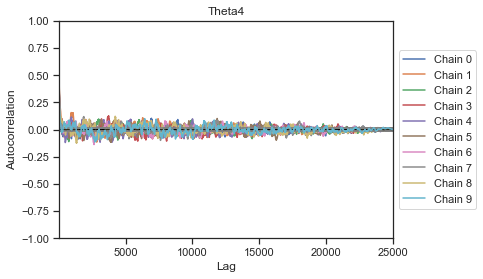

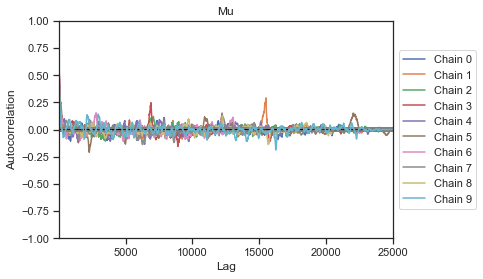

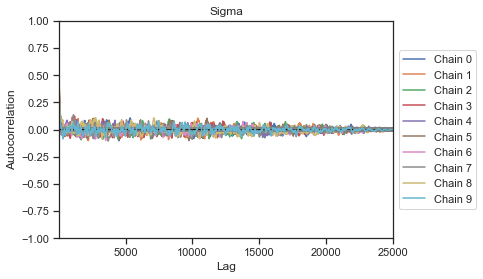

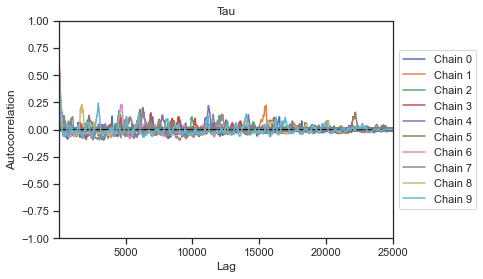

In [60]:
for j, name in enumerate(param_names):
    plt.figure()
    for i in range(10):
        autocorrelation_plot(emcee_trace[i,j,:], label=f'Chain {i}')
    plt.title(name)
    plt.legend(bbox_to_anchor=[1, 0.5], loc='center left')

<span style="color:blue"> <i> 7. Using the package "daft", plot a graphical model in this problem. <br> Note that we have $J$ experiments each with $n_j$ data, each its own mean $\theta_j$, but common variance $\sigma$. The mean $\theta_j$ has a hyperprior, generated as a
gaussian with some mean $\mu$ and variance $\tau$.<br>
</i></span><br>

In [2]:
!pip install daft

In [3]:
import daft

The below cell sets up latex in matplotlib. This will take few minutes, and you don't need to do it again once they are installed.

In [4]:
import matplotlib
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
rc('text.latex', preamble=r'\usepackage{amsmath}')

Hint: Here is an example: (taken from https://github.com/KIPAC/StatisticalMethods/blob/8232a7b7e870b82088fe3589b8a796430e9076d6/examples/SDSScatalog/FirstPGM.ipynb)

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

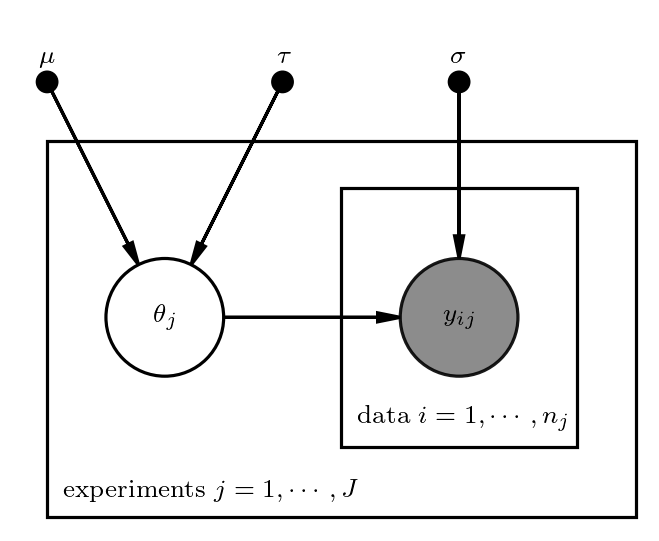

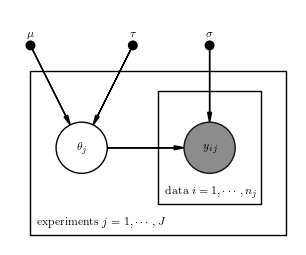

In [33]:
rc("font", family="serif", size=8)
rc("text", usetex=True)


# Instantiate a PGM.
pgm = daft.PGM([2.8, 2.3], origin=[0.3, 0.3], grid_unit=2.6, node_unit=1.3, observed_style="inner")

# Hierarchical parameters.
pgm.add_node(daft.Node("mu", r"$\mu$", 0.5, 2.25, fixed=True))
pgm.add_node(daft.Node("tau", r"$\tau$", 1.5, 2.25, fixed=True))
pgm.add_node(daft.Node("sigma", r"$\sigma$", 2.25, 2.25, fixed=True))

# Latent variable:
pgm.add_node(daft.Node("Thetaj", r"$\theta_{j}$", 1, 1.25))

# Data:
pgm.add_node(daft.Node("y_ij", r"$y_{ij}$", 2.25, 1.25, plot_params={'fc':'gray', 'alpha':0.9}))

# Add in the edges.
pgm.add_edge("mu", "Thetaj")
pgm.add_edge("tau", "Thetaj")
pgm.add_edge("Thetaj", "y_ij")
pgm.add_edge("sigma", "y_ij")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2.5, 1.5], label=r"experiments $j = 1, \cdots, J$",
    shift=-0.1))
pgm.add_plate(daft.Plate([1.75, 0.8, 1, 1], label=r"data $i = 1, \cdots, n_j$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig(colabpath+"PGM2.png", dpi=230)

from IPython.display import Image
Image(filename=colabpath+"PGM2.png")

***

#### Problem 3 - Mixture Model for Outliers

Suppose we have data that can be fit to a linear regression, apart from a few outlier points. It is always better to understand the underlying generative model of outliers. <br><br>
Consider the following dataset, relating the observed variables $x$ and $y$, and the error of $y$ stored in $\sigma_y$. <br><br>
We'll propose a simple linear model, which has a slope and an intercept encoded in a parameter vector $\theta$. The model is defined as follows:
![alt text](https://drive.google.com/uc?id=1OoTMvH-TJdp6k2WBj2vE6C6zg9EbRU4q)
Given this model, we can compute a Gaussian likelihood for each point:
![alt text](https://drive.google.com/uc?id=13a2HRXUfwgPH1d9WyfX34RnhpF_WyH_Y)
The total likelihood is the product of all the individual likelihoods. Computing this and taking the log, we have:
![alt text](https://drive.google.com/uc?id=13tNTebbY-0HHPQ7qp2porEQ9c1PhrTbF)
This should all look pretty familiar if you read through the previous post. This final expression is the log-likelihood of the data given the model, which can be maximized to find the $\theta$ corresponding to the maximum-likelihood model. Equivalently, we can minimize the summation term, which is known as the loss:
![alt text](https://drive.google.com/uc?id=1e32Q3YU3lhOl46eSUvbw7oxlofT6MjE6)
This loss expression is known as a squared loss; here we've simply shown that the squared loss can be derived from the Gaussian log likelihood.

In [58]:
# Load the data
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

<span style="color:blue"> <i> 1. Determine $\theta = [\theta_0, \theta_1]$ which maximize the likelihood (or, equivalently, minimize the loss). As in Problem 2-1, you can use scipy.optimize.fmin. Plot the best-fit line (on top of data points) using $\theta$ from the MAP solution. Make sure to show errorbars. </i></span><br>

Optimization terminated successfully.
         Current function value: 100.708712
         Iterations: 54
         Function evaluations: 105
Theta = [39.69976475  0.23621178]


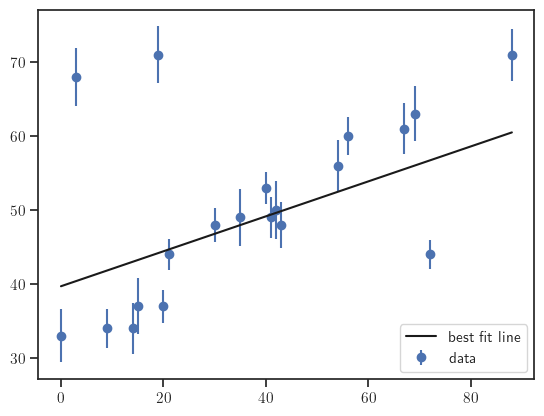

In [59]:
from scipy import optimize

def loss(theta, x=x, y=y, e=e):
    return np.sum((y-(theta[0]+theta[1]*x))**2/(2*e**2))

opt_theta = optimize.fmin(lambda theta: loss(theta,x,y,e),[33,10])
print('Theta =', opt_theta)

plt.errorbar(x, y, yerr=e, marker='o', linestyle='', label='data', zorder=0)
plt.plot(x, opt_theta[0]+opt_theta[1]*x, label='best fit line', color='k', zorder=1)
plt.legend()
plt.show()

Clearly, we get a poor fit to the data because the squared loss is overly sensitive to outliers.

The Bayesian approach to accounting for outliers generally involves modifying the model so that the outliers are accounted for. For this data, it is abundantly clear that a simple straight line is not a good fit to our data. So let's propose a more complicated model that has the flexibility to account for outliers. One option is to choose a mixture between a signal and a background:
![alt text](https://drive.google.com/uc?id=1hlPPudaCOMLJtQaTA2QSgwDocCc86GPo)
What we've done is expanded our model with some nuisance parameters: $\{g_i\}$ is a series of weights which range from 0 to 1 and encode for each point $i$ the degree to which it fits the model. $g_i=0$ indicates an outlier, in which case a Gaussian of width $\sigma_B$ is used in the computation of the likelihood. This $\sigma_B$ can also be a nuisance parameter, or its value can be set at a sufficiently high number, say 50.

Our model is much more complicated now: it has 22 parameters rather than 2, but the majority of these can be considered nuisance parameters, which can be marginalized-out in the end, just as we marginalized (integrated) over $p$ in the Billiard example. Let's construct a function which implements this likelihood. As in the previous post, we'll use the emcee package to explore the parameter space.

<span style="color:blue"> <i> 2. As in Problem2-Part5, define log-prior (already given to you), log-likelihood and log-posterior. </i></span><br>

In [60]:
def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_B):
    g = theta[2:]
    term1 = g/np.sqrt(2*np.pi*e**2)*np.exp(-(y-(theta[0]+theta[1]*x))**2/(2*e**2))
    term2 = (1-g)/np.sqrt(2*np.pi*sigma_B**2)*np.exp(-(y-(theta[0]+theta[1]*x))**2/(2*sigma_B**2))
    return np.sum(np.log(term1+term2))

def log_posterior(theta, x, y, e, sigma_B):
    if not np.isfinite(log_prior(theta)):
        return -np.inf
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

Now, run the MCMC samples.

In [61]:
ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with
theta1=opt_theta
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

Once we have these samples, we can exploit a very nice property of the Markov chains. Because their distribution models the posterior, we can integrate out (i.e. marginalize) over nuisance parameters simply by ignoring them! <br><br>
We can look at the (marginalized) distribution of slopes and intercepts by examining the first two columns of the sample:

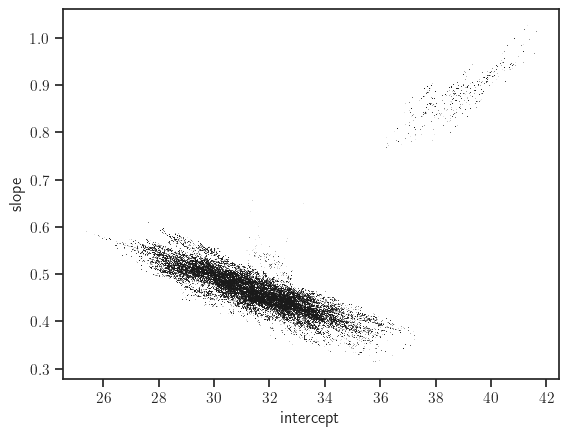

In [62]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope')
plt.show()

We allowed the model to have a nuisance parameter $0 < g_i < 1$ for each data point: $g_i = 0$ indicates an outlier. We can also allow sb to be a nuisance parameter to marginalize over (or just make it a large number). Now, let us define an outlier whenever posterior $E(g_i) < 0.5$.
<br><br>
<span style="color:blue"> <i> 3. Using such cutoff at $g = 0.5$, identify an outlier and mark them on the plot. Also, plot the marginalized best model over the original data (with errorbar).  </i></span><br>

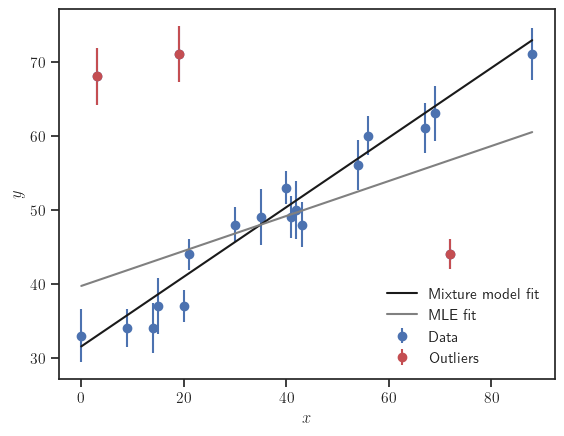

In [63]:
theta0_MCMC = np.mean(sample[:,0])
theta1_MCMC = np.mean(sample[:,1])

mean_g = np.array([np.mean(sample[:,i]) for i in range(2,22)])

plt.errorbar(x, y, yerr=e, marker='o', linestyle='', label='Data', zorder=0)
plt.errorbar(x[mean_g<0.5], y[mean_g<0.5], yerr=e[mean_g<0.5], marker='o', linestyle='', color='r', label='Outliers', zorder=0)
plt.plot(x, theta0_MCMC+theta1_MCMC*x, label='Mixture model fit', color='k', zorder=1)
plt.plot(x, opt_theta[0]+opt_theta[1]*x, label='MLE fit', color='gray', zorder=1)

plt.legend(frameon=False)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

***